# Analyzing Customer Behavior and Predicting Churn in the Telecommunications Firm

## Install packages

## Project Outline

### Business Understanding
- General Telecommunication Customer Churn Overview
- Objectives
- Hypothesis
- Analytical Questions


### Data Understanding
- import packages
- Load Data
- EDA (check head, shape, info, describe, duplicates, null values etc)
- Univariate Analysis (Histogram, Box plots, outlier checks, density plots)
- Bivariate Analysis (Pair plots, Correlation heatmap, Bar charts)
- Multivariate Analysis (PCA)
- Answer Analytical questions
- Test hypothesis

### Data Preparation
- Check if dataset is ballanced (Visualisation)
- Split data into x and y, (training and evaluation)
- Encoding y and categorical variables
- Create Transformers (imputation and scaling)

### Modelling & Evaluations
- Chose models to train (distance, gradient descent, tree based +)
- Train on unbalanced dataset
- Train on balanced dataset
- Hyperparemeter tuning
- Model persistance



## BUSINESS UNDERSTANDING

#### General Telecommunication Customer Churn Overview

In the 2022 State of Customer Churn in Telecom survey, it was found that customer loyalty to telecom providers is down 22% post-pandemic, with customer stickiness being impacted more by the customer experience than ever. Further, customers are now more price sensitive, with 58% perceiving telco offerings as expensive.
Source: https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn

Some reasons for churn in telecoms
It emerged that churn in the telecom industry is most often due to high customer effort. Customers canceled their contracts for the following reasons:

- companies wasted their time (37% waited too long to have their issue resolved)
- they had to call more than once (51%)
- untrained or incompetent agents (37% thought the reps were rude or had a negative approach)
- inferior self-service options (14%).
Source: https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in,more%20than%20once%20(51%25)

Machine learning can be a powerful tool for telcos to predict customer churn and keep their customer base. ML is used across many industries, and its application in the telecommunications industry is no different. Machine learning is one way of achieving artificial intelligence.
Source: https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn



#### OBJECTIVES
- In this project, task is to develop a Classification Machine learning model to predict whether a new Telco customer will churn or not churn.
- To understand the dataset and find the lifeline value of each cutomer and determine which factors affect the rate at which customers stop using their network.

#### Datasets
Three datasets from three different sources have been provided for our Machine Learning Modelling
- The first 3000 records of the dataset will be accessed remotely in a database hosted in a Microsoft SQL Server.
- The second part of the data is hosted on a GitHub repository in a file named LP2_Telco-churn-second-2000.csv
- The third part of the dataset with 2000 records named Telco-churn-last-2000.xlsx was found in a OneDrive folder, this dataset has no labels and will be used to test our machine learning model.

##### Data Dictionary


 - **customerID**        - Uniquely Identify each customer
 - **gender**            - whether a customer is a Male or Female
 - **SeniorCitizen**     - whether customer is >60 years or not (Yes or No)
 - **Partner**           - Whether customer have a partner or not (Yes or No)
 - **Dependents**        - Whether customer have a dependents or not (Yes or No)
 - **tenure**            - How many months customer has been on the network
 - **PhoneService**      - Whether the customer is satisfied with the phone services
 - **MultipleLines**     - Whether the customer is satisfied with the multiple lines service
 - **InternetService**   - Whether the customer is satisfied with the internet service
 - **OnlineSecurity**    - whether the customer is satisfied with the online security service
 - **OnlineBackup**      - Whether the customer is satisfied with the onlince backup service
 - **DeviceProtection**  - Whether the customer is satisfied with the device protection service
 - **TechSupport**       - Whether the customer is satisfied with the tech support service
 - **StreamingTV**       - Whether the customer is satisfied with the streaming TV service
 - **StreamingMovies**   - Whether the customer is satisfied with the streaming Movies service
 - **Contract**          - Whether the customer opted for month-to-month, one-year and two-years contract with the Telco
 - **PaperlessBilling**  - Whether the customer is satisfied with the Paperless Billing service
 - **PaymentMethod**     - Whether the customer opted for electronic, mailed check, bank transfer and credit card payment methods
 - **MonthlyCharges**    - Monthly customer charges
 - **TotalCharges**      - Yearly customer charges
 - **Churn**             - Whether a customer will stop using the Telco's network or not (Yes and No)


#### HYPOTHESIS
We will seek to test the following hypothesis

1.  The average number of churn for Female customers is greater than or equal to that of Male customers.

2.  The average amount of TotalCharges for customers that churn is greater than or equal to those that did not churn.

3.  The average number of tenure for customers that churn is less than or equal to those that did not churn

4.  The average number of churn for customers that have Month_to_nonth contract is greater than or equal to those with 'One year' contract.

5.  The average number of churn for customers that have Yes value for streamingTV is less than or equal to those with No values.

6.  The average number of customers with dependents that will churn is greater than or equal to that of customers with no dependents.

7.  The average number of churn for customers that have **Yes** values for **seniorCitizen** is greater than or equal to those with **No** values.

8.  The average number of churn for customers that have 'One year' contract is greater than or equal to those with 'Two-year' contract.



#### ANALYTICAL QUESTIONS
The following analytical questions will help us gain insight and as well as confirm our hypothesis

1. What is the relationship between gender and Churn
2. What is the trend between Contract and churn
3. What is the most used payment method for **seniorCitizen** and the relationship with churning
4. What is the churn trend for customers gender and whether they have dependents or not
5. what is the trend in churn for the paymentMethod
6. what is the trend between payment methods and gender and how it affect churning
7. what is the trend in churn for contract
8. What is the trend in Churn for SeniorCitizen
9. What is the trend in churn and PaperlessBilling
10. How does internetService affect churning
11. how does phoneService affect churning
12. How does internetService and OnlineSecurity affect churn
13. How does StreamingTV and StreamingMovies affect churn
14. How does paperlessBilling and paymentMethod affect churn
15. How does gender and contract affect churn

### Data Understanding

#### Step 3 - Import all the necessary packages

In [82]:
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import warnings 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import ttest_ind

warnings.filterwarnings('ignore')

### Loading Datasets

#### Create a connection by accessing your connection string with your defined environment variables

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [3]:
connection = pyodbc.connect(connection_string)

In [4]:
#Reading data from SQL server
query = "Select * from dbo.LP2_Telco_churn_first_3000"

telco_churn_sql = pd.read_sql(query, connection)

In [5]:
#dataset fromGitHub

telco_churn_git=pd.read_csv('data/telco_churn_git.csv')

In [6]:
telco_churn_sql.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [7]:
telco_churn_git.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [8]:
#Making copies of data frames

churn_sql=telco_churn_sql.copy()
churn_git=telco_churn_git.copy()

### EDA

In [9]:
churn_sql.shape

(3000, 21)

In [10]:
churn_git.shape

(2043, 21)

**Observations**
- The dataset from SQL is made up of 3000 rows and 21 columns
- The dataset from GitHub is made up of 2043 rows and 21 columns

In [11]:
churn_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Observations**
- Both datasets have the same number of columns and the same column names
- The data from SQL have 5 bool, 2 float, 1 int64 and 13 object data types
- The data from GitHub have 1 float, 2 int64, and 18 object
- The column SeniorCitizen is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning



**Investigating and correcting columns with wrong data types**

In [13]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)


churn_sql.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [14]:
churn_git.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


**Observations**

- We can observe that all the following columns in the dataset from SQL (telco_churn_sql) **SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling and Churn** contains **True and False** values where as the same columns in dataset from Github (telco_churn_git) apart from **SeniorCitizen** which is made up of categoricals (0 & 1), all others contains **Yes and No**, in order to concatenate both dataframes into one dataset, we will have to assign **True to Yes and False to No**, as well as correct the data types accordingly.

- **tenure** in bothe datasets is int64 type

- **MonthlyCharges** in bothe datasets is float type, which is correct after investigating the values.

- **TotalCharges** is a float in telco_churn_sql dataset where as it is an object type in telco_churn_git, upon investigating the values it is supposed to be a float type, we will therefore rectify this before concatenating the datasets.
- The column **SeniorCitizen** is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning

**Checking if there are duplicates in the datasets**

In [15]:
churn_sql.duplicated().sum()

0

In [16]:
churn_git.duplicated().sum()

0

- there are no duplicates in both datasets

**Checking if there are missing values in the datasets**

In [17]:
churn_sql.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
churn_git.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observations**

- The data frame from GitHub (churn_git) contains no missing values
- The data frame from SQL server contains missing values
- We will fill this values with the most frequent value in each column


In [19]:
churn_sql.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# assigning columns with bool type to columns_to_convert
columns_to_convert = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Convert columns with bool type to object (str)
churn_sql[columns_to_convert] = churn_sql[columns_to_convert].astype(str)


In [21]:
#Selecting only object types to apply function on
object_columns = churn_sql.select_dtypes(include=['object'])

#droping columns we will not want to apply function to
object_columns = object_columns.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

#Function to replace True with Yes and False with No
for column in object_columns:
    churn_sql[column]=churn_sql[column].astype(str).fillna('No').apply(lambda x: 'Yes' if 'true' in x.lower() else 'No')

In [24]:
churn_sql.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [25]:
#Replacing 1 with Yes and O with No
churn_git['SeniorCitizen']=churn_git['SeniorCitizen'].astype(str).apply(lambda x: 'Yes' if '1' in x.lower() else 'No')

In [26]:
churn_git.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [27]:
#churn_git['TotalCharges']=pd.to_numeric(churn_git['TotalCharges'])

In [28]:
#investigating why getting error trying to change type
churn_git['TotalCharges'].iloc[218]

' '

In [29]:
# Get unique values in 'TotalCharges' column
#unique_values = churn_git['TotalCharges'].unique()

# Convert unique values to a list and print
#print(unique_values.tolist())


In [30]:
#Replacing the ' ' with nothing
churn_git['TotalCharges']=churn_git['TotalCharges'].str.replace(' ','')

In [31]:
churn_git['TotalCharges'].iloc[218]

''

In [32]:
#Changing type from object to float
churn_git['TotalCharges']=pd.to_numeric(churn_git['TotalCharges'])

In [33]:
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   object 
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Concatenating dataframes**

In [34]:
df_churn= pd.concat([churn_sql, churn_git])

In [35]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [36]:
df_churn.shape

(5043, 21)

In [37]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [38]:
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,No,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,3,No,2693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,3,No,3158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
object_columns = df_churn.select_dtypes(include=['object'])
object_columns = object_columns.drop('customerID', axis=1)

for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'No phone service', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'No internet service', 'Yes']


OnlineBackup
['No', 'No internet service', 'Yes']


DeviceProtection
['No', 'No internet service', 'Yes']


TechSupport
['No', 'No internet service', 'Yes']


StreamingTV
['No', 'No internet service', 'Yes']


StreamingMovies
['No', 'No internet service', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



- We observe that **MultipleLines**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** contains unusual unique values

- for **InternetService** it is possible to have **No** if customer have no internet access

these unsual unique values will be investigated further and replace with apprioprate value in neccessary  

In [40]:
multilines_no_ph_ser=df_churn[df_churn['MultipleLines']=='No phone service']
multilines_no_ph_ser.shape

(220, 21)

- Usually if your phone shows a "No Service" message, it means that your device cannot find a signal from your cellular carrier and you cannot make calls, send texts, and other normal functions.
- Since this is similar to not having a line at all, **No phone service** will be replced by **No**

In [41]:
df_churn['MultipleLines']=df_churn['MultipleLines'].str.replace('No phone service', 'No')

In [42]:
Onlsec_no_intnet_ser=df_churn[df_churn['OnlineSecurity']=='No internet service']
Onlsec_no_intnet_ser.shape

(429, 21)

In [43]:
Onlsec_no_intnet_ser.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1648,2164-SOQXL,Female,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,406.05,No
1381,0927-CNGRH,Male,No,No,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
561,5088-QZLRL,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65,No
2019,9710-NJERN,Female,No,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
1431,3266-FTKHB,Male,No,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.15,343.45,No
731,4936-YPJNK,Female,No,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.90,199.45,No
1286,2717-HVIZY,Female,No,No,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,163.60,No
974,7094-MSZAO,Male,No,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.05,218.50,No
574,5546-BYZSM,Female,No,No,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.45,775.60,No
753,7636-XUHWW,Male,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.90,33.70,No


- We can observe that for all the rows with value of **No internet service** also have **No** as their corresponding **InternetService** column value
- For **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** No internet service will mean No to all, **No internet service** will then be replaced with **No**

In [44]:
for column in object_columns:
    df_churn[column]=df_churn[column].str.replace('No internet service', 'No')
  

In [45]:
for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'Yes']


OnlineBackup
['No', 'Yes']


DeviceProtection
['No', 'Yes']


TechSupport
['No', 'Yes']


StreamingTV
['No', 'Yes']


StreamingMovies
['No', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



In [46]:
df_churn.duplicated().sum()

0

In [47]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [49]:
#diving deeper to understand the cause of null
df_churn[df_churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
1670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
1754,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


- We observe 8 missing values in TotalCharges
- We also observe that for all these customers tenure was 0, which means they have not spent one month with the Telco
- Since TotalCharges is the product of tenure and MonthlyCharges,  then TotalCharges for these rows will be 0, hence we will fillna with 0

In [50]:
df_churn['TotalCharges']=df_churn['TotalCharges'].fillna(0)

In [51]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Univariate Analysis 

- (Histogram, Box plots, outlier checks, density plots)

In [53]:
num_cols=df_churn.select_dtypes(include='number')

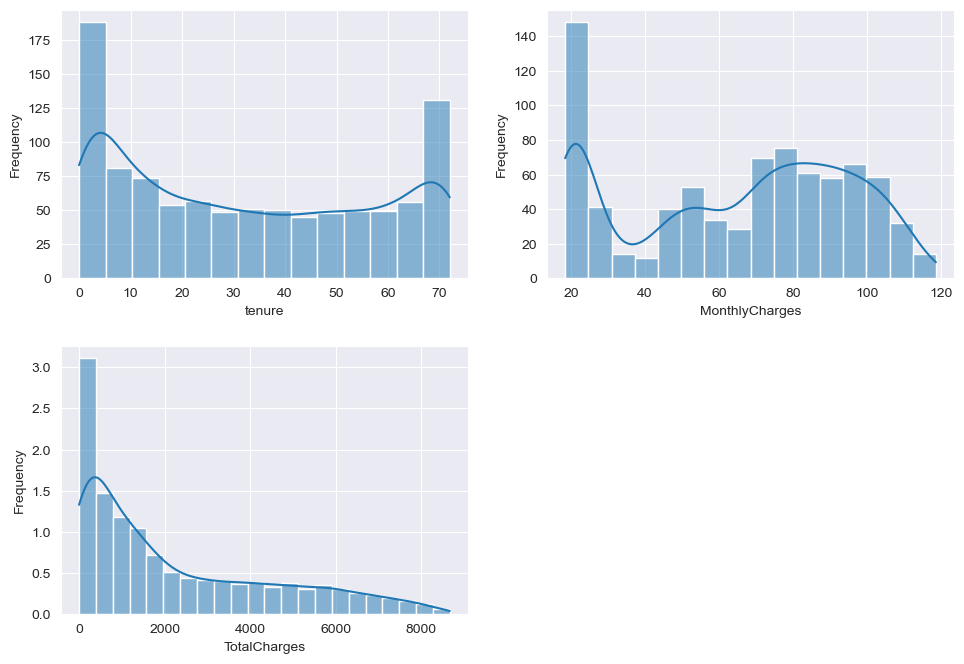

In [106]:
plt.figure(figsize=(10, 7))

for i, variable in enumerate(num_cols):
    plt.subplot(2,2, i + 1)
    sns.histplot(df_churn,x=df_churn[variable],kde=True, stat='frequency')
    plt.tight_layout(pad=2)

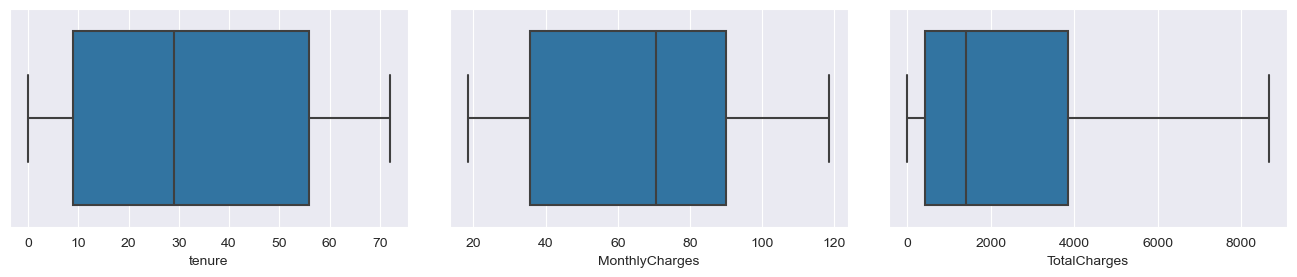

In [149]:
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4, i + 1)
    sns.boxplot(df_churn, x=df_churn[variable])
    plt.tight_layout(pad=3)

#### Observations

- From the histogram we noticed that after aproximately the first 5 months of tenure, the count of customers reduced drastically and then start reducing slowly untill about the 55th month it started increasing again, from the boxplot there no outliers and the median is around 30 months aproximately.
- For MonthlyCharges we noticed that most customers are prepared to pay approximately 20 beyond which number of customers dropped, rose after charge 40 and dropped, rose again after approximately charge of 75 and then dropped after charge of 100, from the boxplot there are no outliers.
- For TotalCharge most of the customers number of customers started droping after total amount charge of around 400 and continue dropping untill no one was will to pay extra after around an amount of 10,000, from the boxplot there are no outliers, however TotalCharge is highly skewed to the right.

In [76]:
obj_cols=df_churn.select_dtypes(include='object')

In [78]:

obj_cols=obj_cols.drop('customerID', axis=1)



In [79]:
obj_cols.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


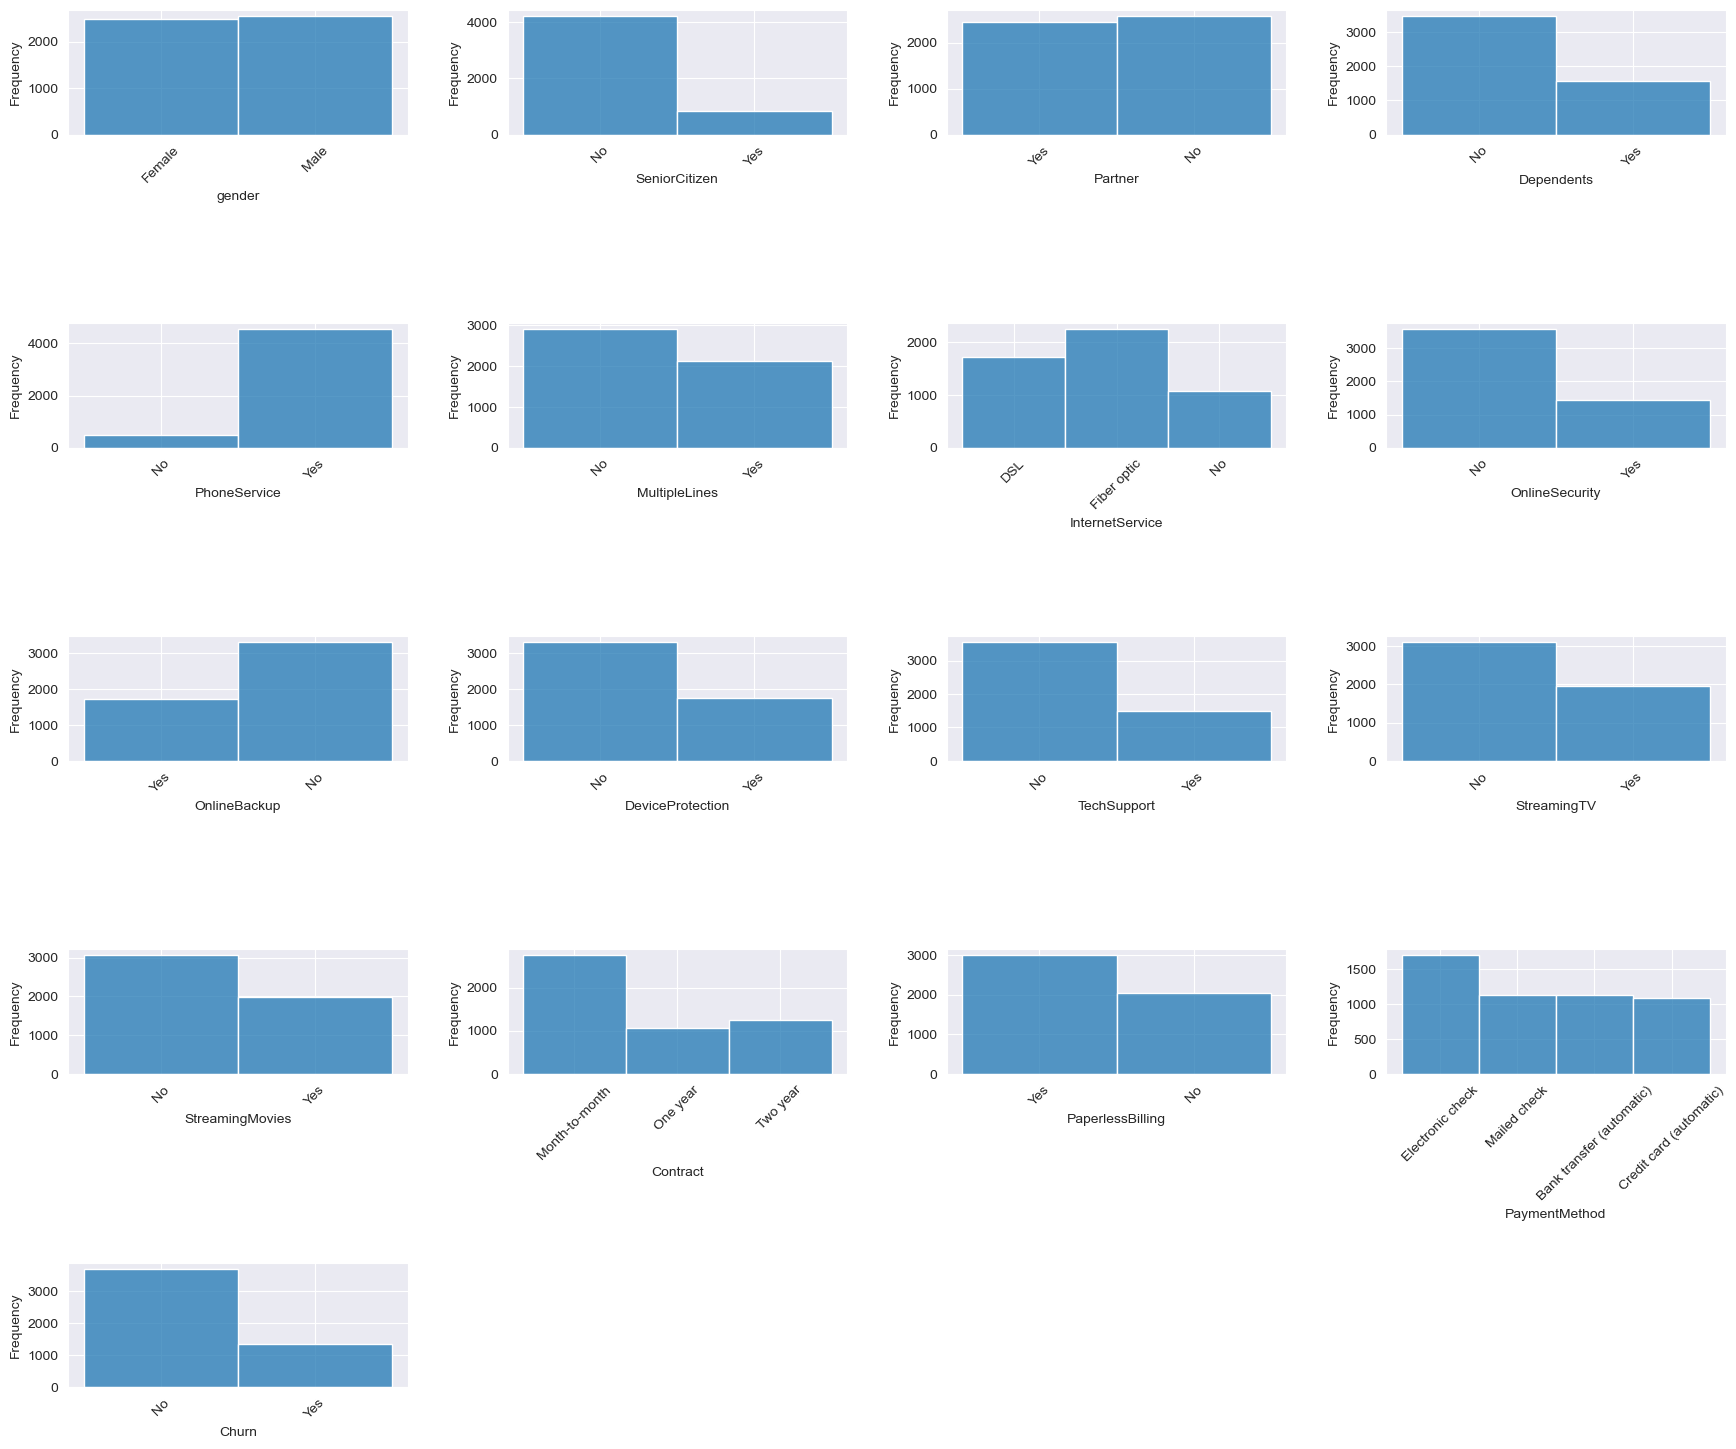

In [140]:
plt.figure(figsize=(18, 15))

for i, variable in enumerate(obj_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(df_churn,x=df_churn[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

#### Observations

- Female and Male are evenly distributed, despite Male being slightly higher
- There are approximately 4000 non senior citizens among the telcos' customers compared to around 500 seniors
- Customers with partners and those without are approximately evenly distributed
- Customers without dependents are more than those with dependents
- Custmers with phone service are more than those without phone service
- Customers without multiple lines are slightly higher than those with multiple lines
- For internet service, more customers are on fibre optic followed by DSL and those with no internet service
- Customers with no online security were more than those with online security
- Customers with no online backup were more than those with online backup
- Customers with no device protection were more than those with device protection
- Customers with no Tech support were more than those with tech support
- Customers with no streaming TV were more than those with streaming TV
- Customers with no streaming Movies were more than those with streaming Movies
- Month to Month contract was more frequent followed by, two year contract and one year contract
- Customers that opted for paperless billing were more than those that did not
- Electronic check was more frequent of the payment methods, whiles the other methods remains evenly distributed
- Customers that did not churn are more than those that churned.

### Bi & Multivariate Analysis

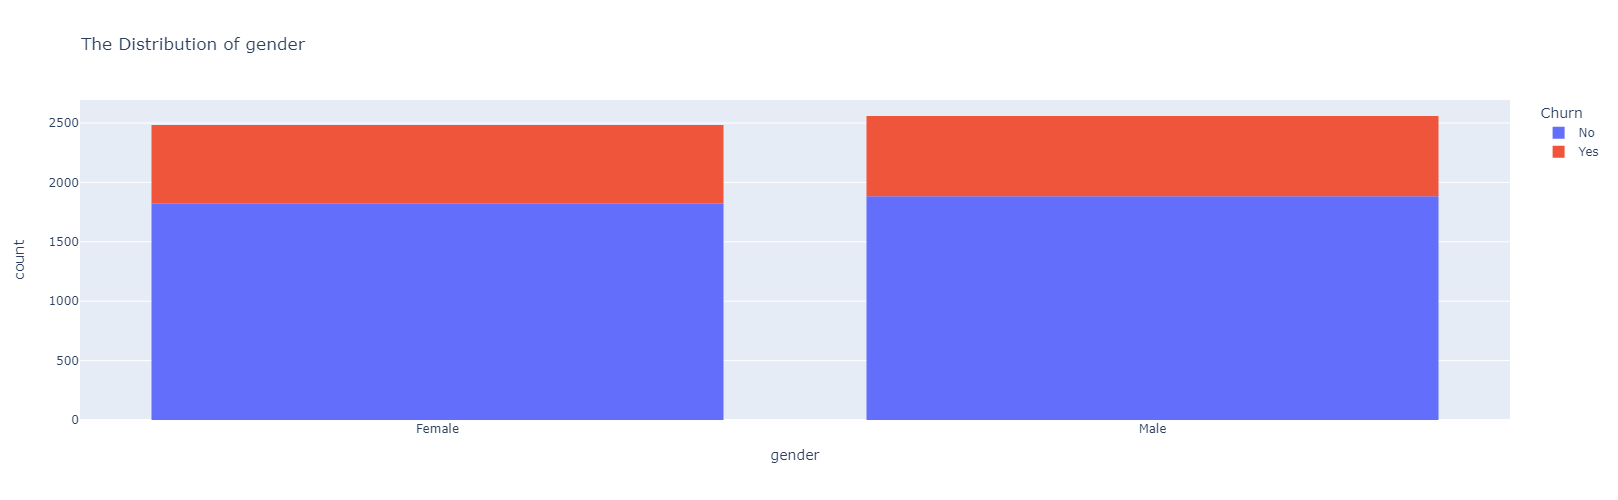

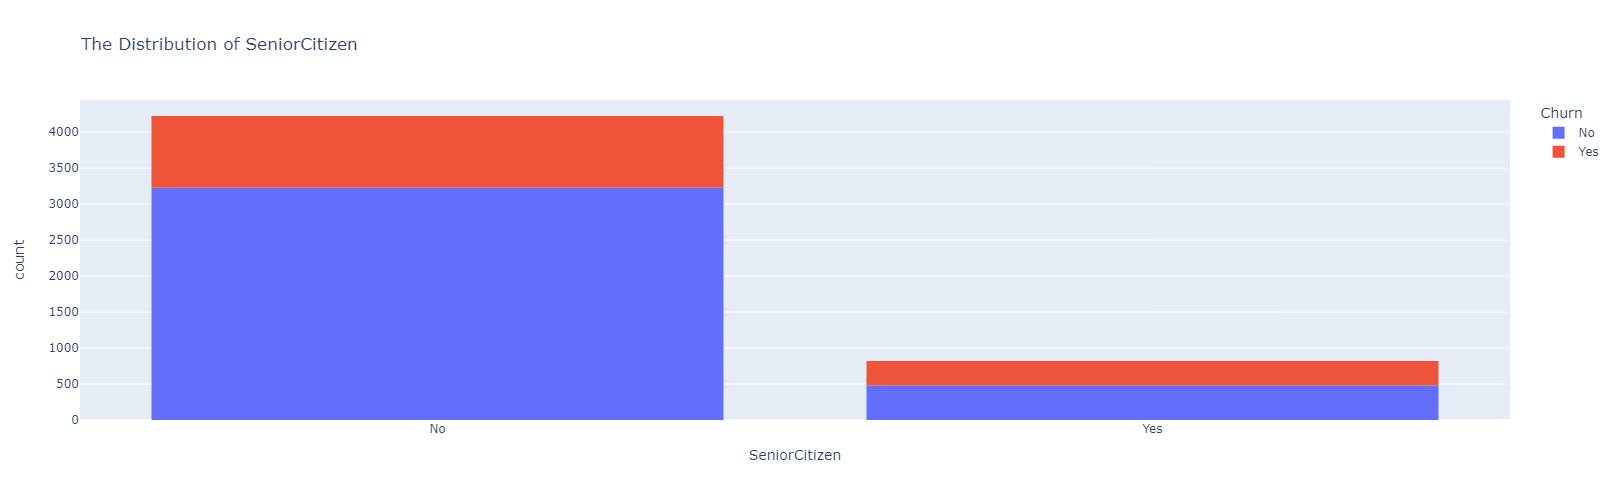

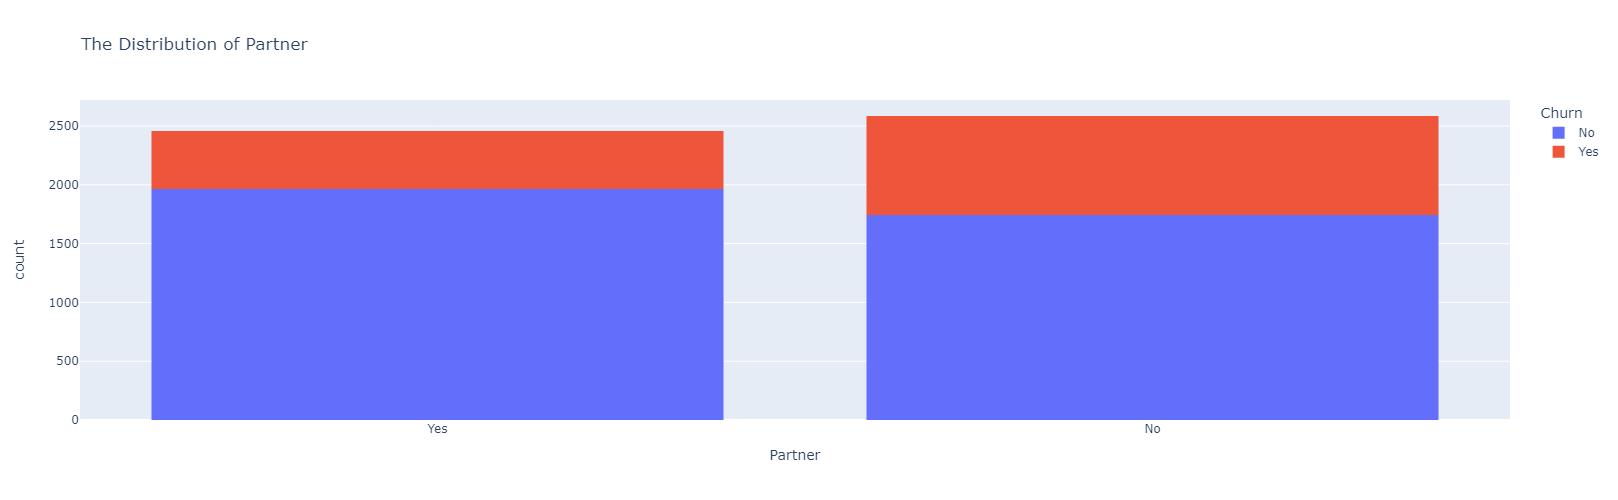

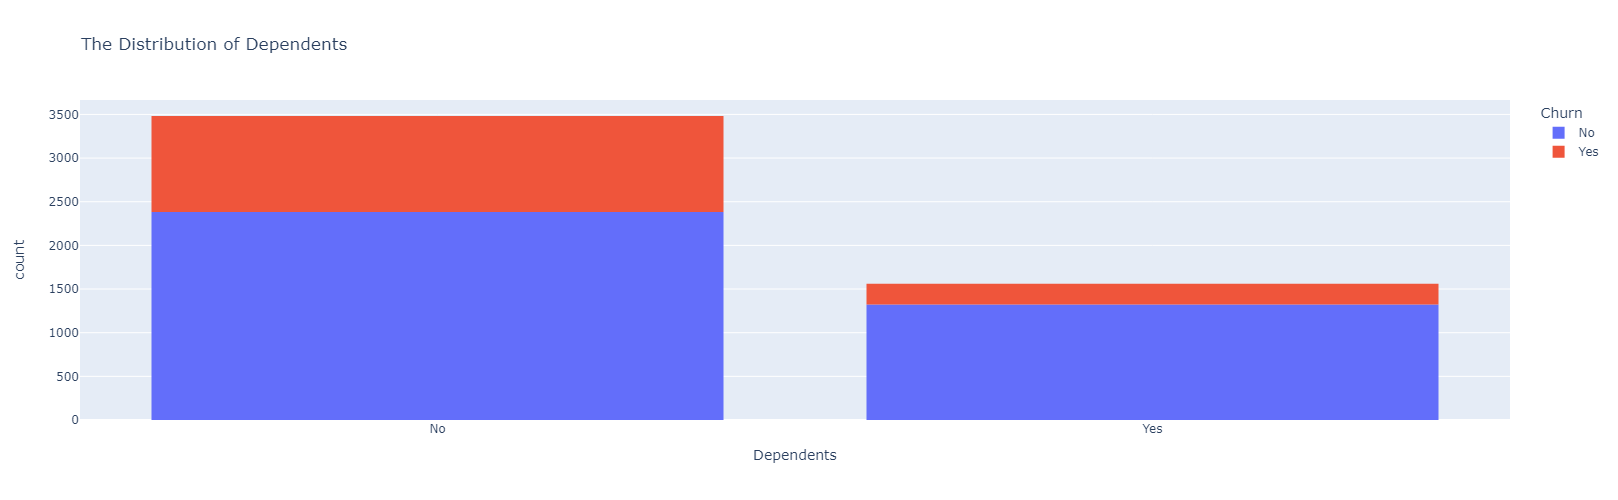

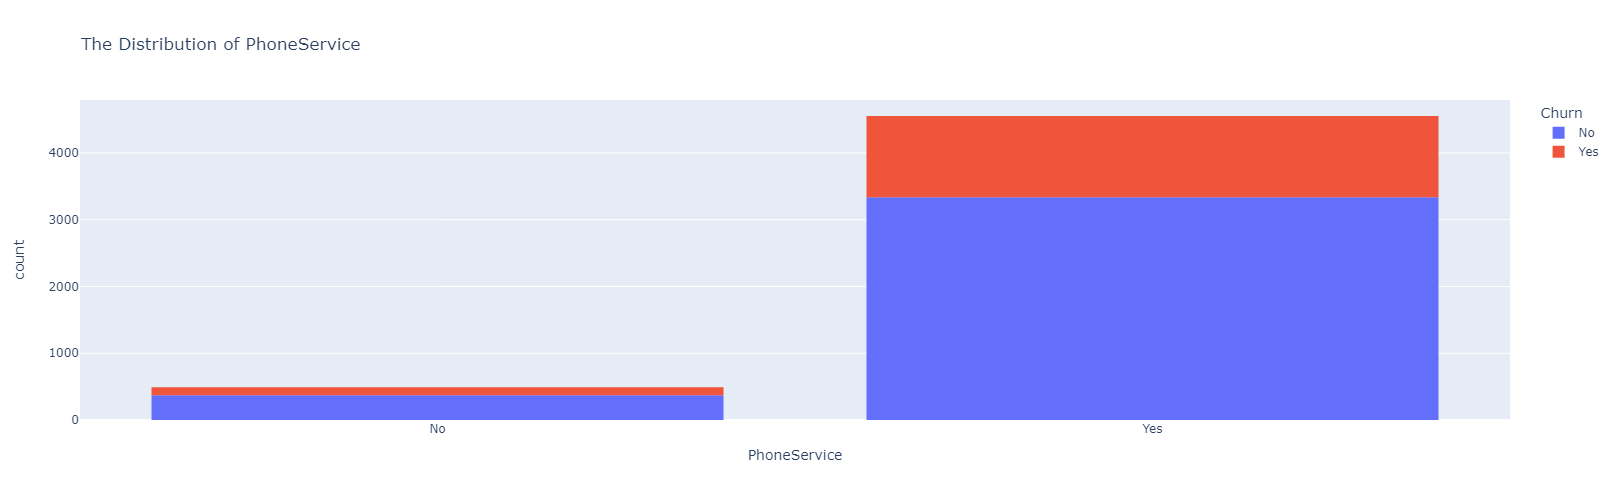

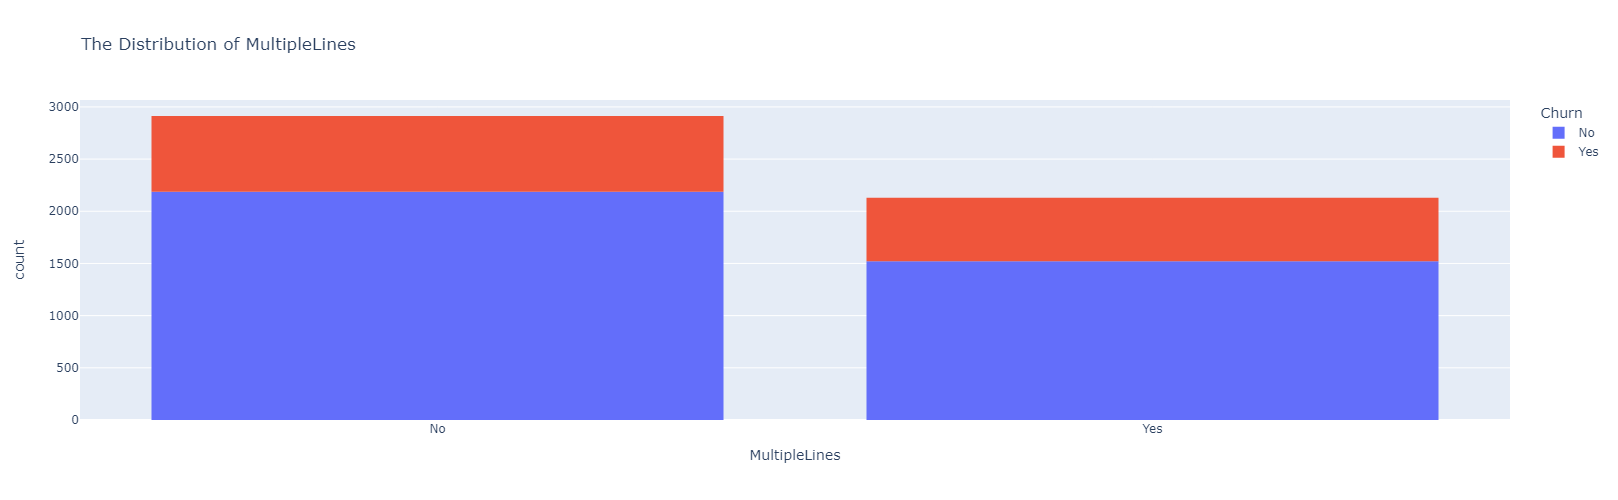

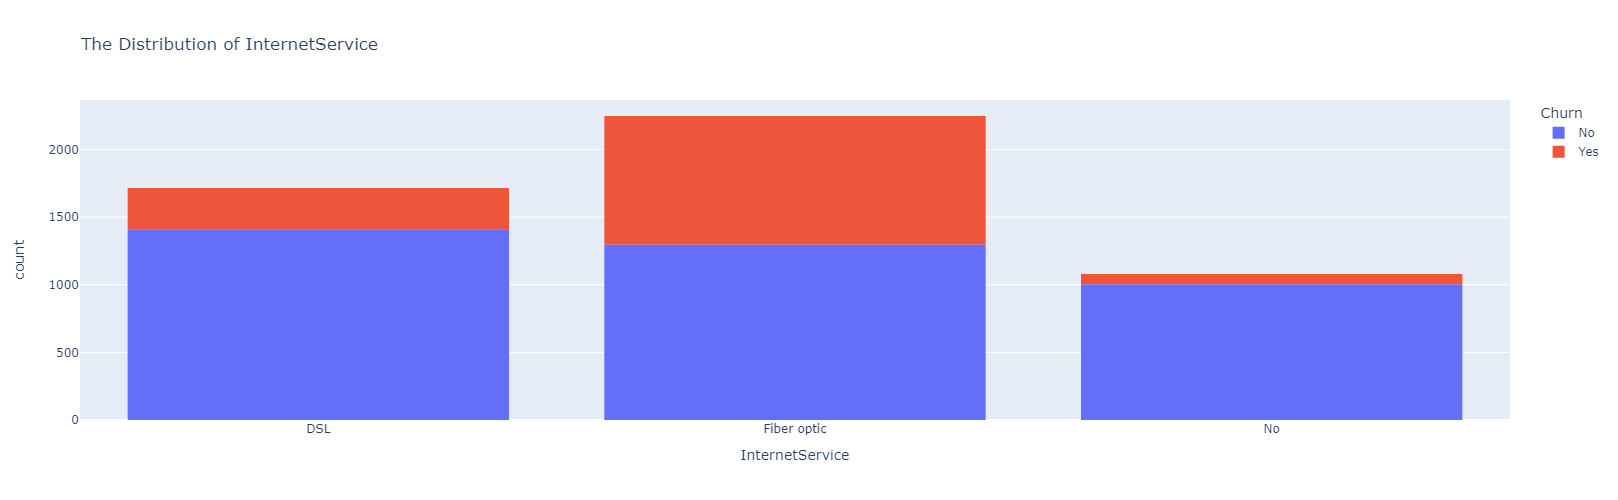

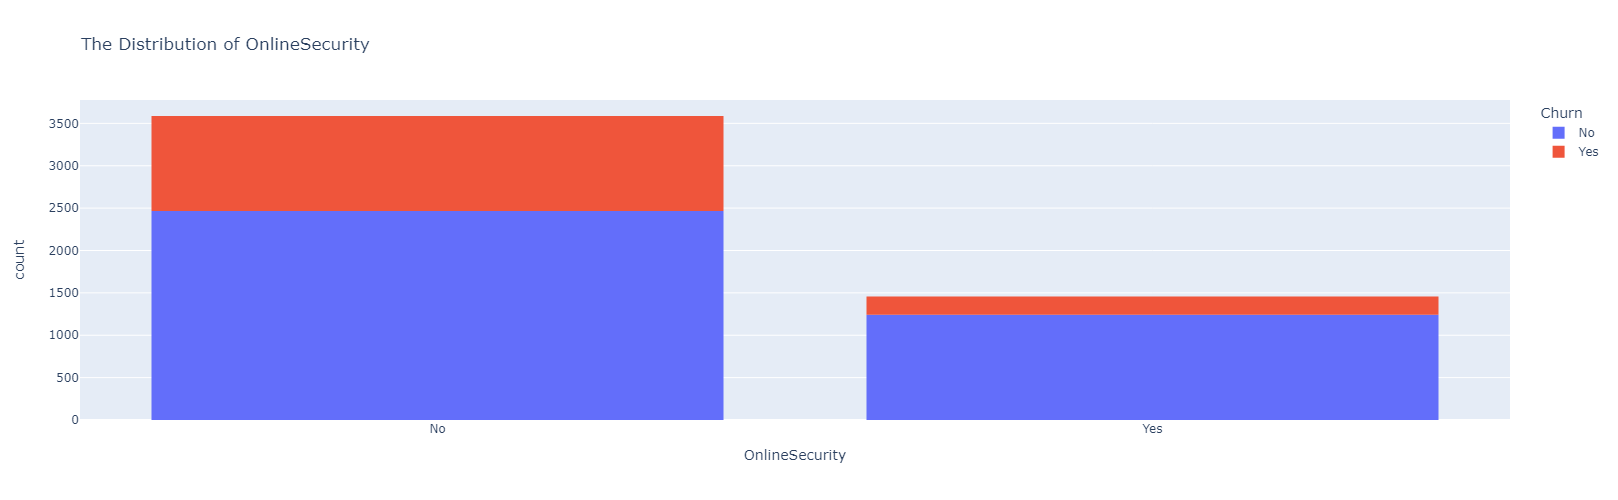

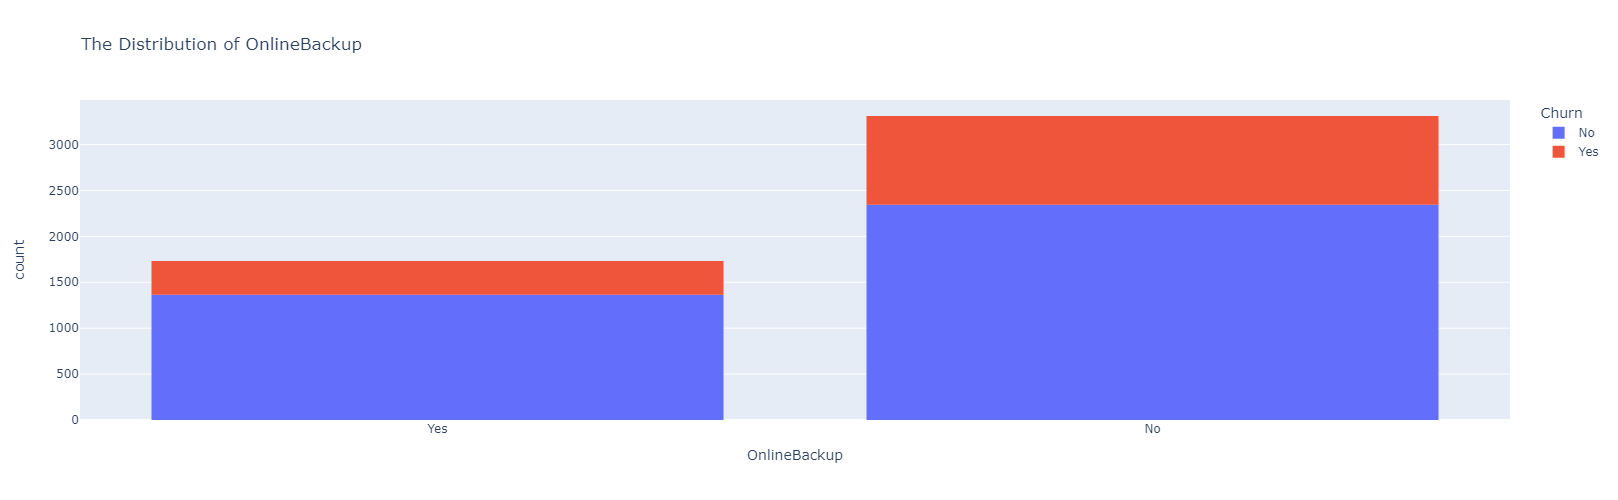

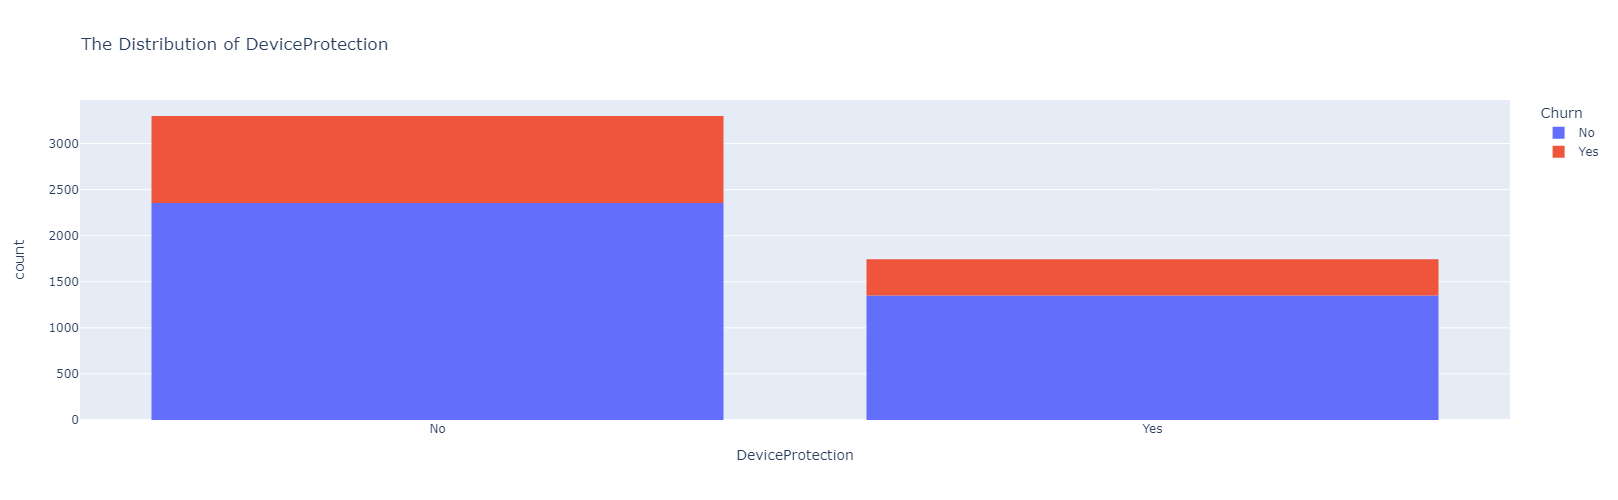

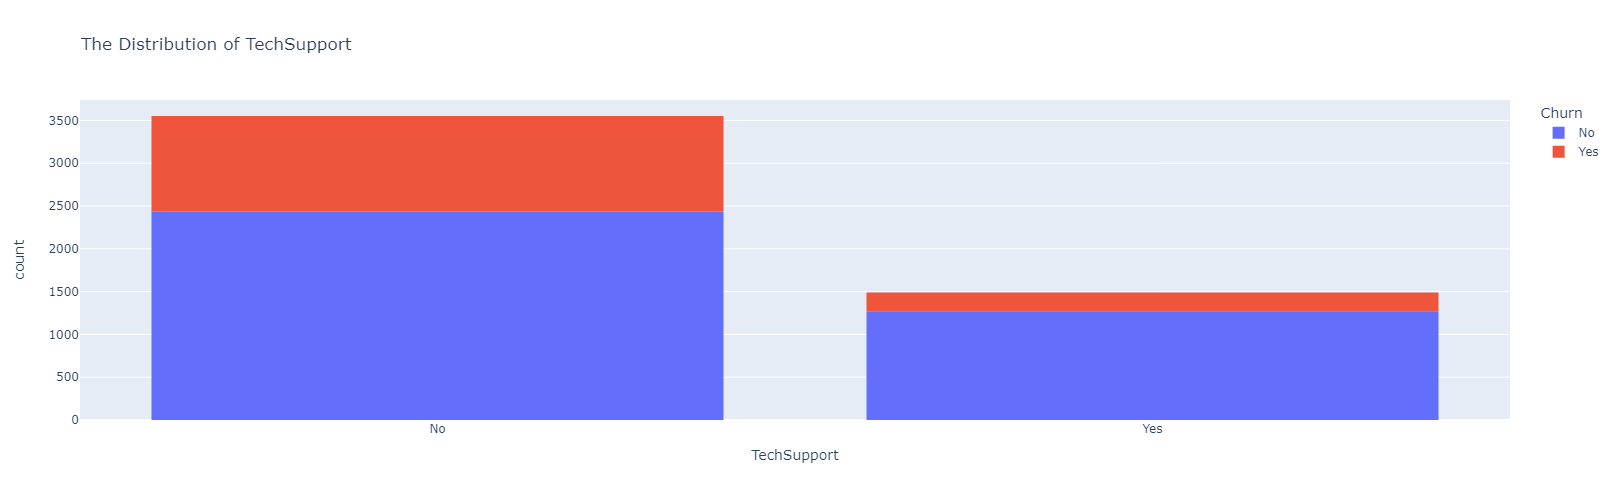

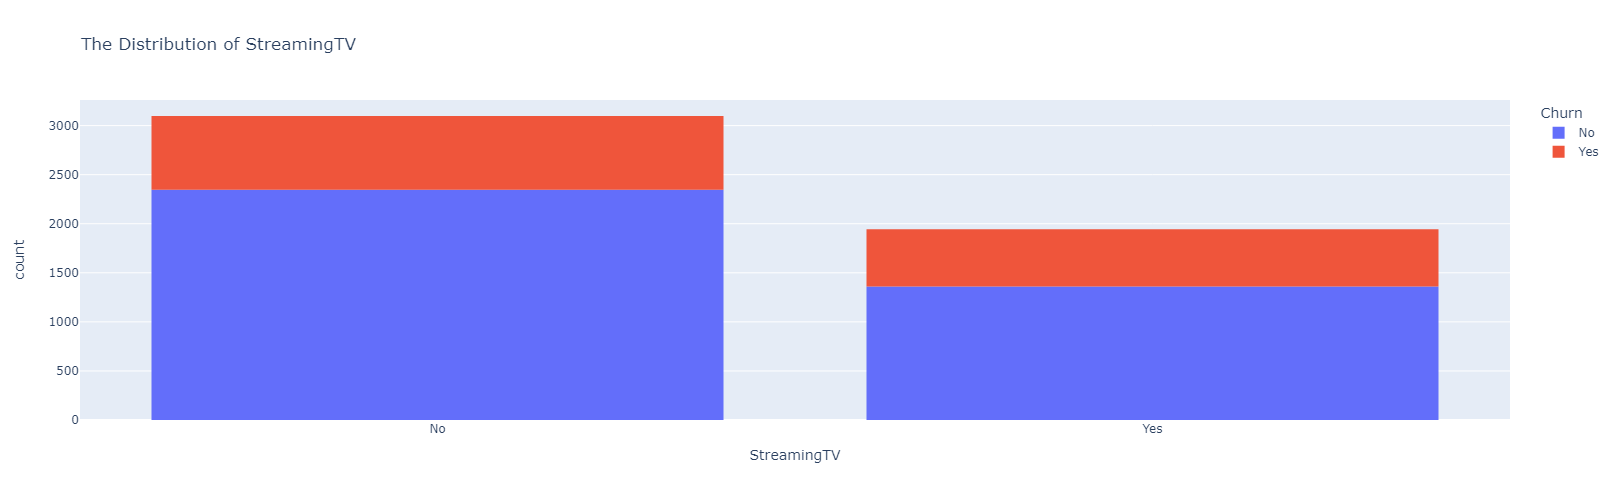

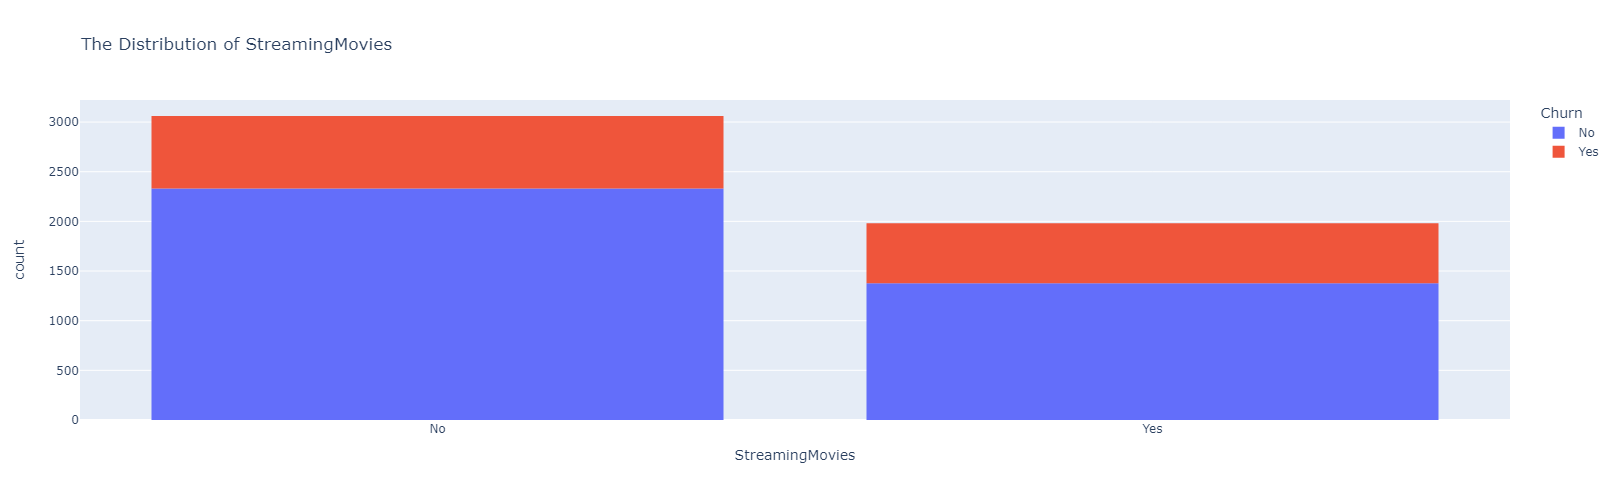

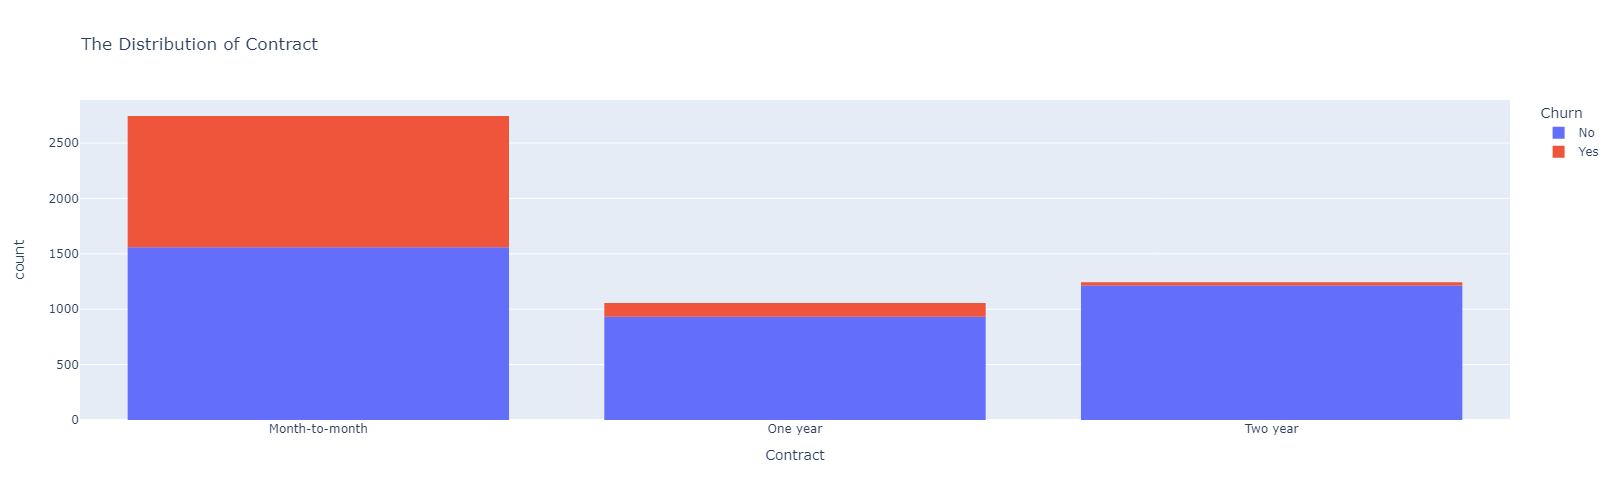

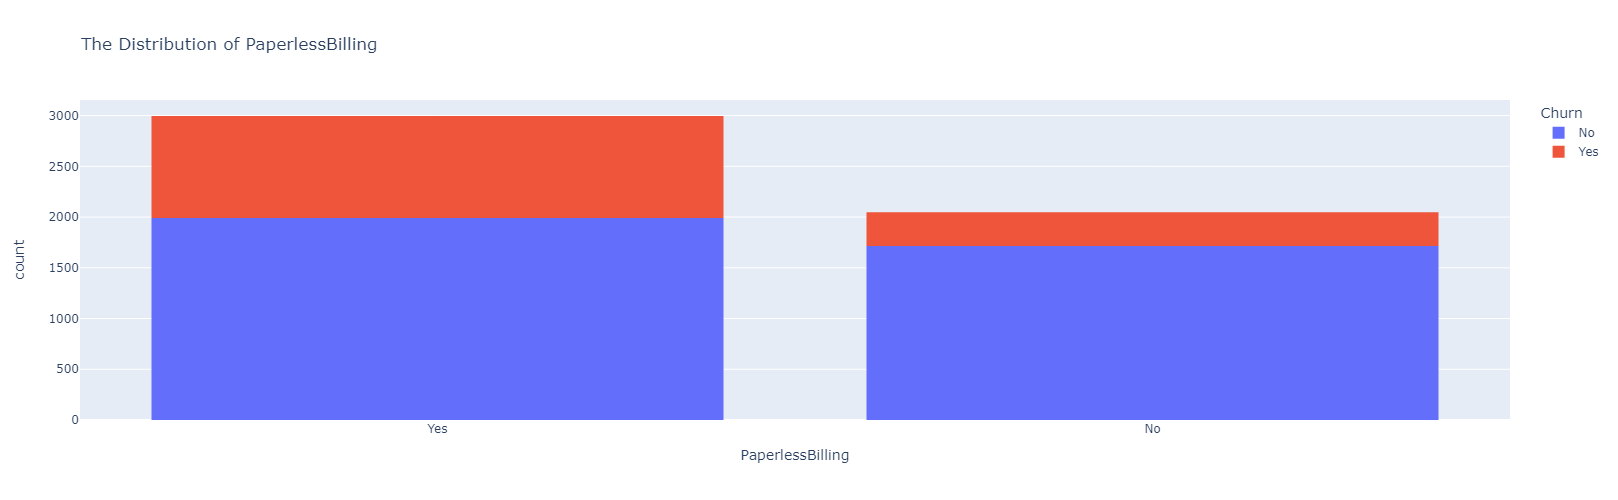

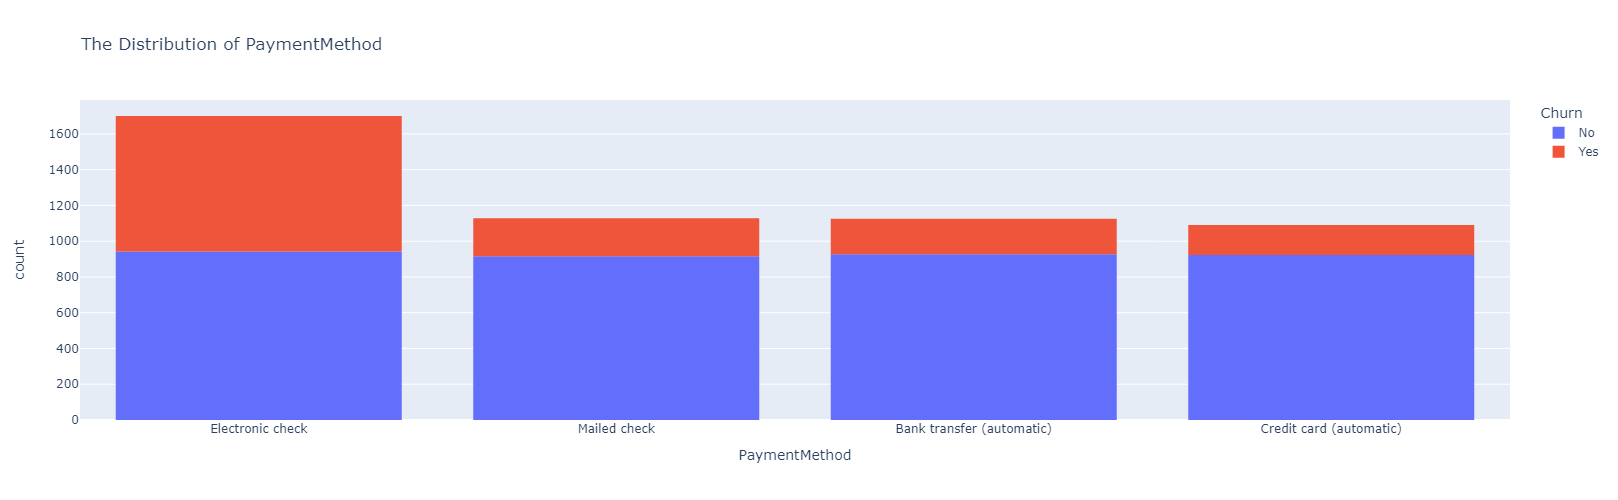

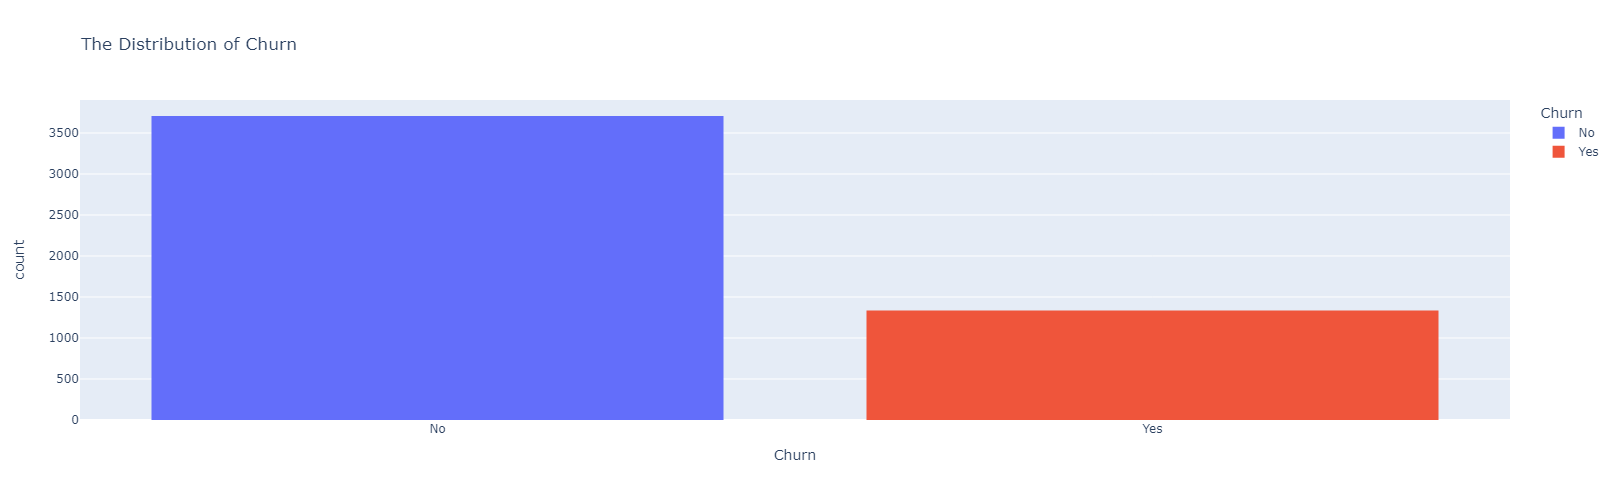

In [153]:
for column in obj_cols.columns:
    #Creating histogram for categorical columns
    fig=px.histogram(df_churn, x= column, color='Churn', title=f'The Distribution of {column}', width=500, height=500)
    fig.show()
    